In [933]:
import numpy as np
import pandas as pd

In [934]:
df=pd.read_csv("data.csv")

In [935]:
df.head()

,AnimalName,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,Dangerous
0,Dog,Fever,Diarrhea,Vomiting,Weight loss,Dehydration,Yes
1,Dog,Fever,Diarrhea,Coughing,Tiredness,Pains,Yes
2,Dog,Fever,Diarrhea,Coughing,Vomiting,Anorexia,Yes
3,Dog,Fever,Difficulty breathing,Coughing,Lethargy,Sneezing,Yes
4,Dog,Fever,Diarrhea,Coughing,Lethargy,Blue Eye,Yes


In [936]:
df.rename(columns={'Dangerous':'condition_is_critical'},inplace=True)

In [937]:
df.drop(columns=['AnimalName'],inplace=True)

In [938]:
df.shape

(871, 6)

In [939]:
df.isnull().sum()

symptoms1                0
symptoms2                0
symptoms3                0
symptoms4                0
symptoms5                0
condition_is_critical    2
dtype: int64

In [940]:
df.dropna(axis=0,inplace=True)

In [941]:
df.isnull().sum()

symptoms1                0
symptoms2                0
symptoms3                0
symptoms4                0
symptoms5                0
condition_is_critical    0
dtype: int64

In [942]:
df[df.duplicated()]

,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,condition_is_critical
402,wasting,stumbling,listlessness,drooling,urination problem,Yes
403,wasting,stumbling,listlessness,drooling,urination problem,Yes
404,wasting,stumbling,listlessness,drooling,urination problem,Yes
405,wasting,stumbling,listlessness,drooling,urination problem,Yes
406,wasting,stumbling,listlessness,drooling,urination problem,Yes
...,...,...,...,...,...,...
845,swelling,nasal discharge,drooling,tiredness,fever,Yes
846,eye discharges,nasal discharge,change their normal behaviour,high body temperature,lameness,Yes
847,stop eating,stop drinking,change their normal behaviour,Lameness,Pains,Yes
848,stop eating,stop drinking,change their normal behaviour,Weight loss,Pains,Yes


In [943]:
df.drop_duplicates(keep='first',inplace=True)

In [944]:
df[df.duplicated()]

,symptoms1,symptoms2,symptoms3,symptoms4,symptoms5,condition_is_critical


In [945]:
df.shape

(439, 6)

In [946]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

In [947]:
X=df.drop(columns=['condition_is_critical'])

In [948]:
y=df['condition_is_critical']

In [949]:
le=LabelEncoder()
for col in X.columns:
    X[col]=le.fit_transform(X[col])
y=le.fit_transform(y)

In [950]:
X_train,X_test,y_trian,y_test=train_test_split(X,y,test_size=0.2)

In [951]:
ada=AdaBoostClassifier()
model=ada.fit(X_train,y_trian)

In [952]:
y_pred=model.predict(X_test)

In [953]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy=accuracy_score(y_test,y_pred)

In [954]:
print('accuracy:',round(accuracy,2)*100,'%')

accuracy: 95.0 %


In [955]:
import matplotlib.pyplot as plt

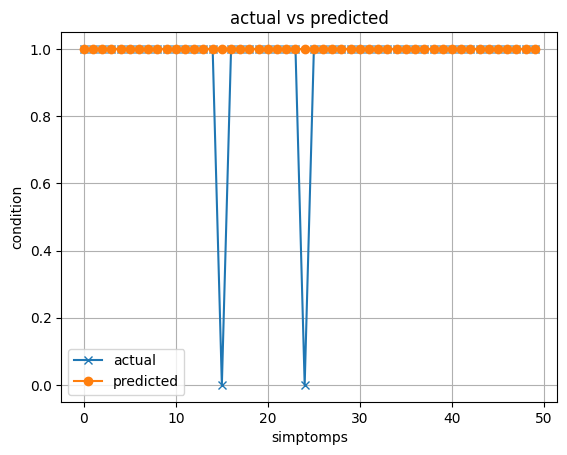

In [956]:
plt.Figure(figsize=(10,10))
plt.plot(y_test[:50], label='actual',marker='x')
plt.plot(y_pred[:50], label='predicted',marker='o')
plt.title('actual vs predicted')
plt.xlabel('simptomps')
plt.ylabel('condition')
plt.legend()
plt.grid(True)
plt.show()

In [957]:
import seaborn as sns


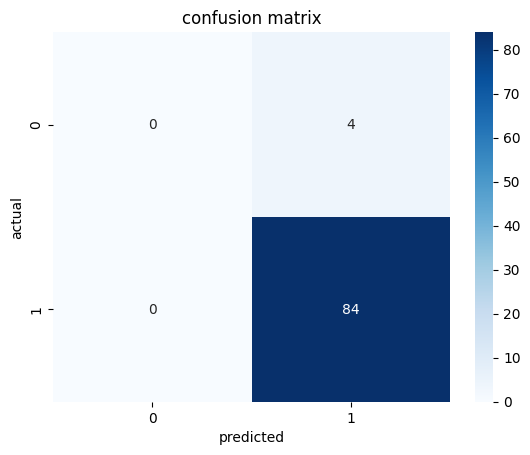

In [958]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()
